<a href="https://colab.research.google.com/github/Sau-bio-info/Python/blob/main/image_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.config.experimental.list_physical_devices()

tf.test.is_built_with_cuda()

True

In [ ]:
(x_train,y_train), (x_test,y_test)= tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(1,1))
  plt.imshow(x_train[index])

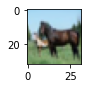

In [ ]:
plot_sample(12)

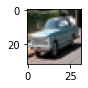

In [ ]:
plot_sample(32)

Scaling or normalising training data so they range between 0 to 1

to scale we divide training data with 255 as the RGB values ranges from 1-255.

In [ ]:
x_train_scaled=x_train/255

x_test_scaled=x_test/255


For labels we will do One hot encoding, in one hot encoding what we basically do is we encode number of columns and presence with true and else with false.

In [ ]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10, dtype="float32"
)

y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10, dtype="float32"
)

In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Training the model.

In [44]:
model= keras.Sequential([
       keras.layers.Flatten(input_shape=(32,32,3)),
       keras.layers.Dense(3000, activation="relu"),
       keras.layers.Dense(1000,activation="relu"),
       keras.layers.Dense(10,activation="sigmoid")    
])

model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train_scaled,y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8152 - accuracy: 0.3548
Epoch 2/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6216 - accuracy: 0.4263
Epoch 3/50
1563/1563 [==============================] - 96s 62ms/step - loss: 1.5419 - accuracy: 0.4560
Epoch 4/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4819 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4316 - accuracy: 0.4957
Epoch 6/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3882 - accuracy: 0.5121
Epoch 7/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3528 - accuracy: 0.5243
Epoch 8/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3165 - accuracy: 0.5384
Epoch 9/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.2836 - accuracy: 0.5505
Epoch 10/50
1563/1563 [==============================] - 10

In [51]:
np.argmax(model.predict(x_train_scaled)[54])

1563/1563 [==============================] - 31s 20ms/step


2

In [52]:
y_train[54]

array([2], dtype=uint8)

prediction gives probablities for 10 neurons we fetch maximum probablity using argmax for a given index in x_train and that turns out to be same class number in y_train which are our labels.